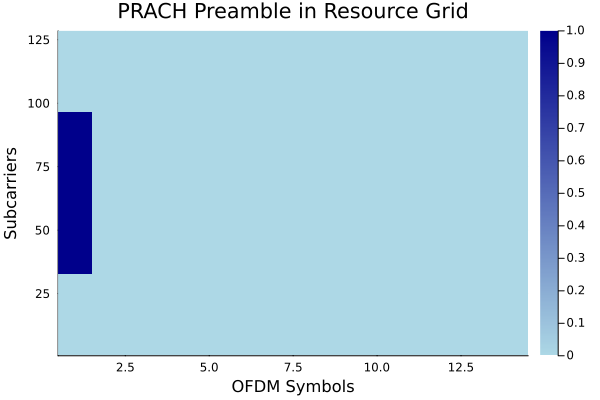

In [2]:
using Plots

# Function to generate a Zadoff-Chu sequence
function zadoff_chu_seq(u, N_ZC)
    n = 0:(N_ZC-1)
    seq = @. exp(-1im * π * u * n * (n + 1) / N_ZC)
    return seq
end

# Function to map PRACH preamble to resource grid
function map_prach_to_resource_grid(seq, N_subcarriers, N_symbols)
    grid = zeros(ComplexF64, N_subcarriers, N_symbols)
    start_idx = div(N_subcarriers - length(seq), 2) + 1
    grid[start_idx:start_idx + length(seq) - 1, 1] = seq
    return grid
end

# Parameters
u = 1                  # Zadoff-Chu root index
N_ZC = 64              # Length of Zadoff-Chu sequence
N_subcarriers = 128    # Number of subcarriers in resource grid
N_symbols = 14         # Number of OFDM symbols

# Generate PRACH preamble sequence
prach_preamble = zadoff_chu_seq(u, N_ZC)

# Map PRACH preamble to resource grid
resource_grid = map_prach_to_resource_grid(prach_preamble, N_subcarriers, N_symbols)

# Plot the resource grid
p1 = heatmap(abs.(resource_grid), title="PRACH Preamble in Resource Grid", xlabel="OFDM Symbols", ylabel="Subcarriers", c=:blues)
display(p1)
